In [431]:
# Import Pandas and Set Path
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [432]:
# Read the Whale Returns CSV File and Clean
csv_path = Path("whale_returns.csv")
whale_returns = pd.read_csv(
    csv_path, parse_dates=True, index_col="Date", infer_datetime_format=True
)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [433]:
# Count Nulls 
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [434]:
# Drop nulls
whale_returns = whale_returns.dropna()
# Validate no more missing values
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [435]:
# Read the Algo Returns CSV File and Clean 
csv_path = Path("algo_returns.csv")
algo_returns = pd.read_csv(
    csv_path, parse_dates=True, index_col="Date", infer_datetime_format=True
)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [436]:
# Count Nulls 
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [437]:
# Drop nulls
algo_returns = algo_returns.dropna()
# Validate no more missing values
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [438]:
# Read the S&P 500 Returns CSV File and Clean 
csv_path = Path("sp500_history.csv")
sp500_returns = pd.read_csv(
    csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True,
)
sp500_returns.sort_index()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [439]:
sp500_returns.sort_index(inplace=True)
sp500_returns

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [440]:
# Check Data Types
sp500_returns.dtypes

Close    object
dtype: object

In [441]:
# Fix Data Types
sp500_returns['Close'] = sp500_returns['Close'].str.replace('$', '').astype(float)
sp500_returns.dtypes

Close    float64
dtype: object

In [442]:
# Calculate SP500 Daily Returns 
sp500_daily_return = sp500_returns.pct_change()
sp500_daily_return

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [443]:
# Drop nulls
sp500_daily_return = sp500_daily_return.dropna()
sp500_daily_return

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [444]:
# Rename Column
sp500_daily_return = sp500_daily_return.rename(columns={
    "Close": "S&P500"
})
sp500_daily_return.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [445]:
# Combine Whale, Algorithmic, and S&P 500 Returns
# Concatenate all DataFrames into a single DataFrame
combined_returns= pd.concat([whale_returns, algo_returns, sp500_daily_return], axis="columns", join="inner")
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


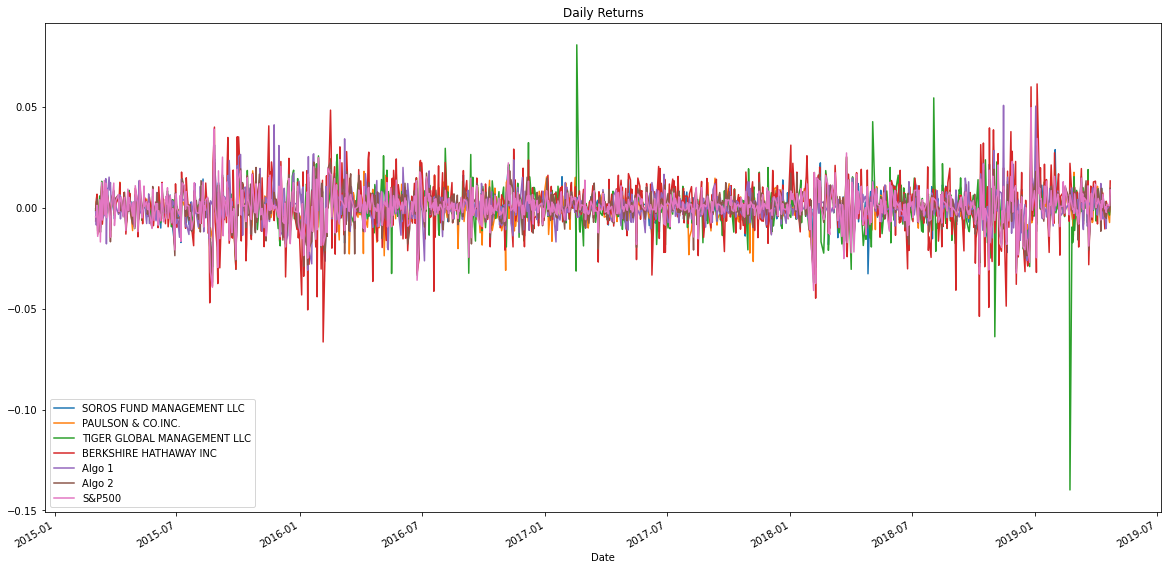

In [446]:
# Plot daily returns
combined_returns.plot(title="Daily Returns", figsize=(20,10))

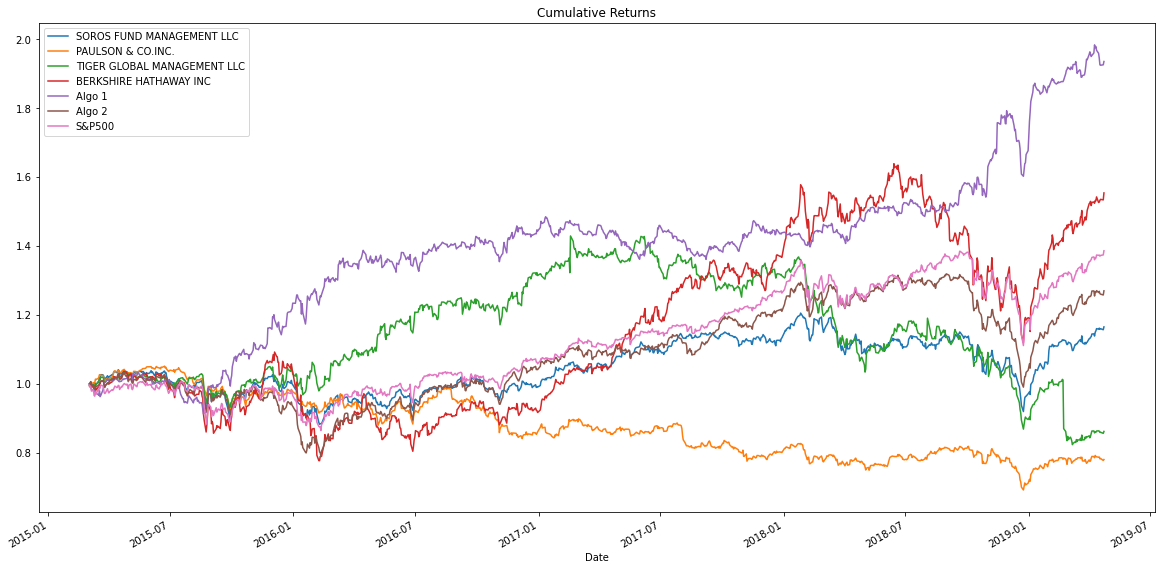

In [447]:
# Plot cumulative returns
combined_cumulative_returns= (1+combined_returns).cumprod()
combined_cumulative_returns.plot(title="Cumulative Returns", figsize=(20,10))

# Does any portfolio outperform the S&P 500?
Berkshire Hathaway INC. , Tiger Global Management LLC. , and Algo 1 are three portfolios that outperform the S&P500.

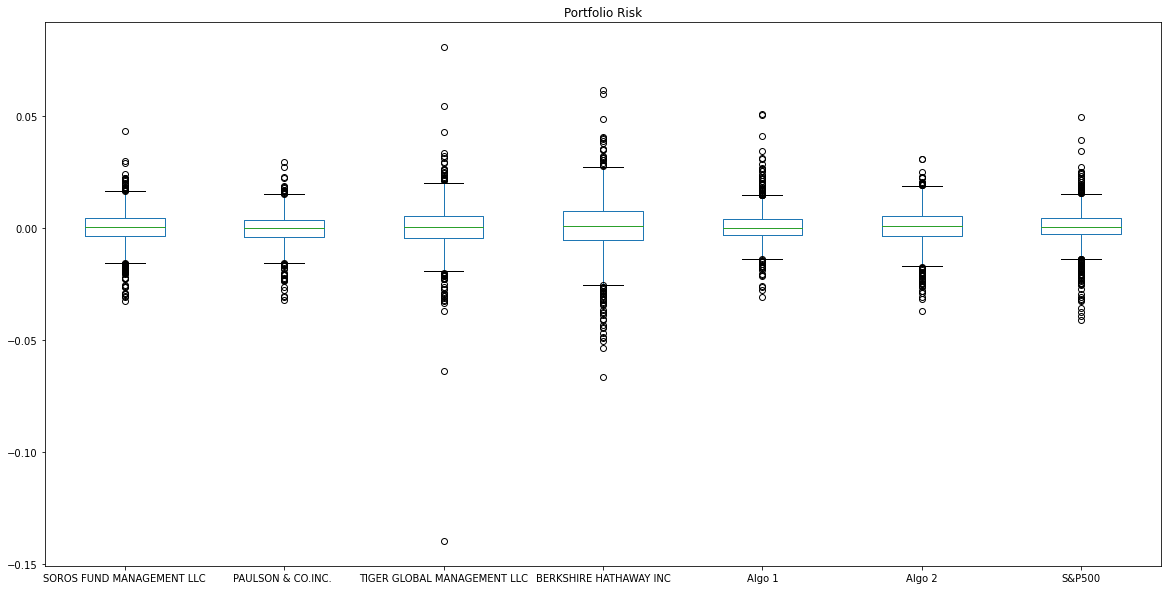

In [448]:
#### BOX PLOT TO VISUALLY SHOW RISK 
combined_returns.plot.box(figsize=(20,10),title="Portfolio Risk")

In [449]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
combined_returns_df = combined_returns.std()
combined_returns_df

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P500                         0.008554
dtype: float64

In [450]:
# DETERMINE WHICH PORTFOLIOS ARE RISKIER THAN THE S&P 500 
SP500 = combined_returns_df > combined_returns_df['S&P500']
SP500

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P500                         False
dtype: bool

In [451]:
# Calculate the annualized standard deviation (252 trading days)
combined_returns_std = combined_returns_df * np.sqrt(252)
combined_returns_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P500                         0.135786
dtype: float64

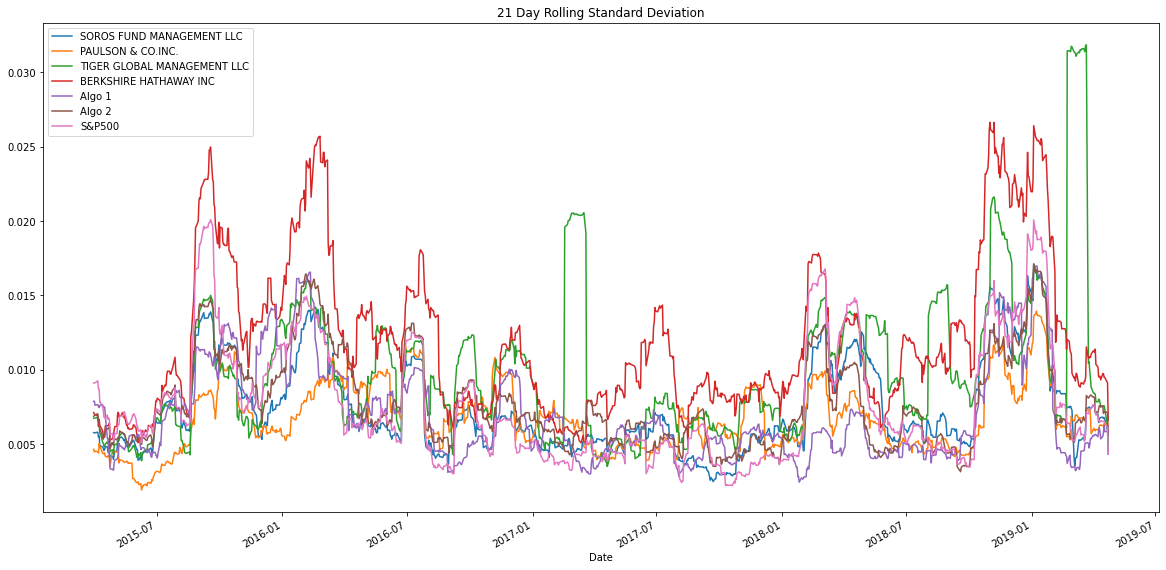

In [452]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window 
combined_returns.rolling(window=21).std().plot(figsize=(20,10),title = "21 Day Rolling Standard Deviation")

In [453]:
# Construct a correlation table 
combined_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


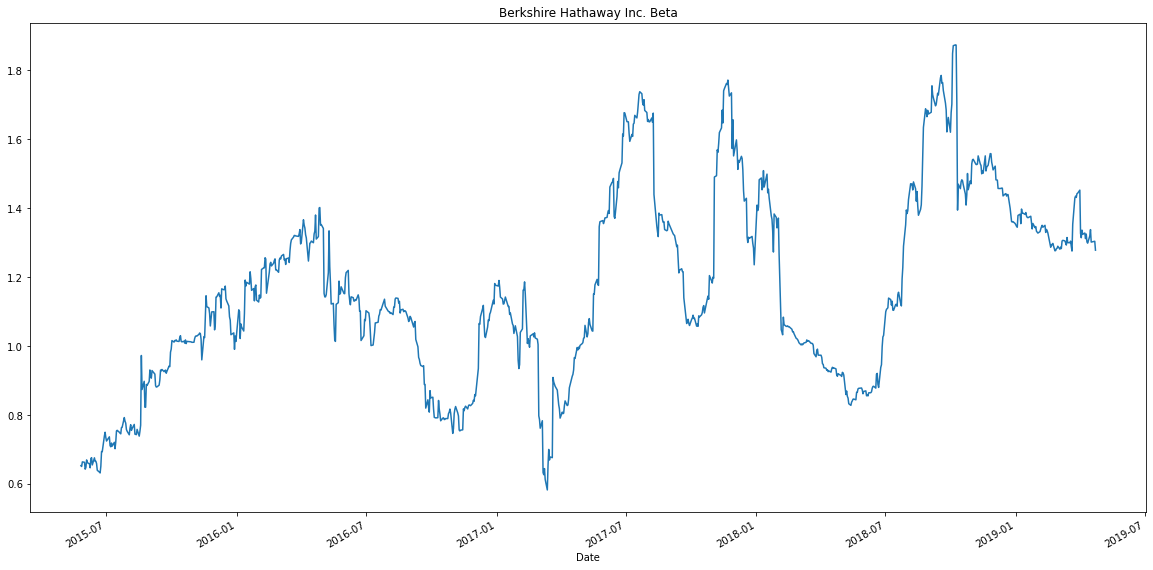

In [454]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500) 
# (Your graph may differ, dependent upon which portfolio you are comparing)
rolling_covariance = combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_returns['S&P500'])
rolling_variance = combined_returns['S&P500'].rolling(window=60).var()
rolling_beta= rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20,10), title="Berkshire Hathaway Inc. Beta")

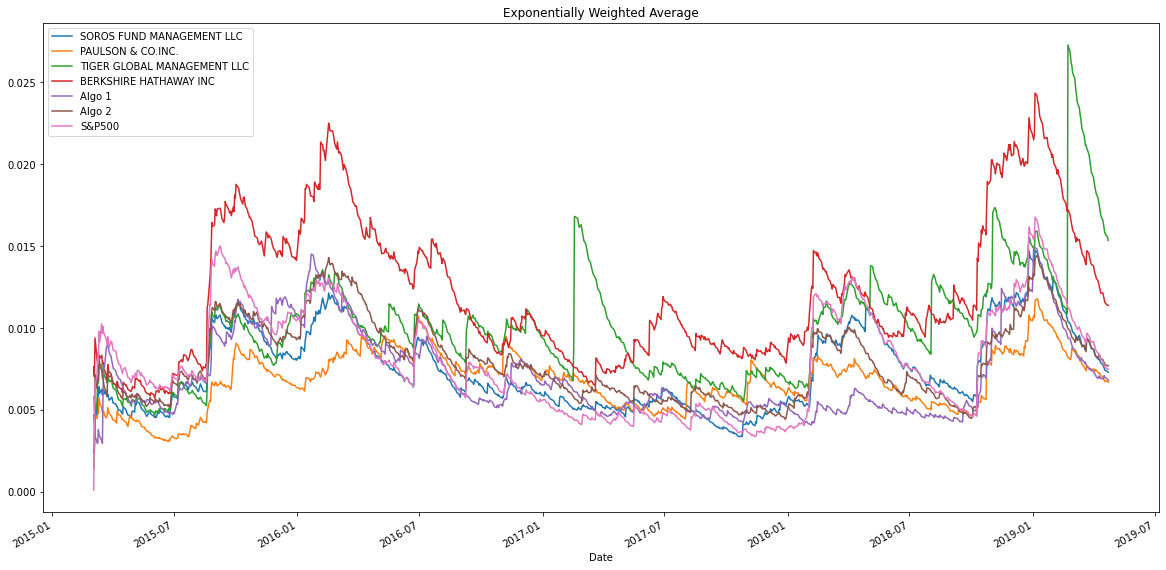

In [455]:
# Calculate a rolling window using the exponentially weighted moving average. 
weighted_moving_average = combined_returns.ewm(halflife=21, adjust=True).std().plot(title="Exponentially Weighted Average", figsize =(20,10))
weighted_moving_average

In [456]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

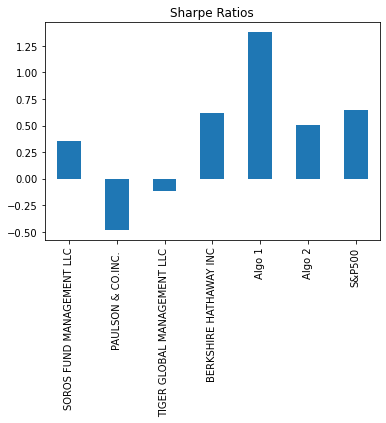

In [457]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [458]:
# Portfolio Returns 
# Choose 3-5 custom stocks with atleast 1 year's worth of historic prices and create a DataFrame of the closing prices and
# dates for each stock 

In [459]:
# Read the first stock
tsla_csv = Path("Data/TSLA.csv")
tsla_df = pd.read_csv(tsla_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
tsla_df.head()

,Symbol,Close
Date,,
2019-01-02,TSLA,62.02
2019-01-03,TSLA,60.07
2019-01-04,TSLA,63.54
2019-01-07,TSLA,66.99
2019-01-08,TSLA,67.07


In [460]:
# Read the second stock
aapl_csv = Path("Data/AAPL.csv")
aapl_df = pd.read_csv(aapl_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
aapl_df.head()

,Symbol,Close
Date,,
2019-01-02,AAPL,39.48
2019-01-03,AAPL,35.55
2019-01-04,AAPL,37.07
2019-01-07,AAPL,36.98
2019-01-08,AAPL,37.69


In [461]:
# Read the third stock
usb_csv = Path("Data/USB.csv")
usb_df = pd.read_csv(usb_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
usb_df.head()

,Symbol,Close
Date,,
2019-01-02,USB,46.35
2019-01-03,USB,45.70
2019-01-04,USB,46.83
2019-01-07,USB,46.61
2019-01-08,USB,46.91


In [462]:
# Concatenate all stocks into a single DataFrame
portfolio = pd.concat([tsla_df, aapl_df, usb_df], axis="columns", join="inner")
portfolio.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2019-01-02,TSLA,62.02,AAPL,39.48,USB,46.35
2019-01-03,TSLA,60.07,AAPL,35.55,USB,45.70
2019-01-04,TSLA,63.54,AAPL,37.07,USB,46.83
2019-01-07,TSLA,66.99,AAPL,36.98,USB,46.61
2019-01-08,TSLA,67.07,AAPL,37.69,USB,46.91


In [463]:
# Reset the index
portfolio = portfolio.reset_index("Date")
portfolio.head()

,Date,Symbol,Close,Symbol,Close,Symbol,Close
0,2019-01-02,TSLA,62.02,AAPL,39.48,USB,46.35
1,2019-01-03,TSLA,60.07,AAPL,35.55,USB,45.70
2,2019-01-04,TSLA,63.54,AAPL,37.07,USB,46.83
3,2019-01-07,TSLA,66.99,AAPL,36.98,USB,46.61
4,2019-01-08,TSLA,67.07,AAPL,37.69,USB,46.91


In [464]:
# Pivot so that each column of prices represents a unique symbol
portfolio= pd.concat([tsla_df, aapl_df,usb_df], axis="rows", join="inner")
portfolio = portfolio.pivot_table(values="Close", index="Date", columns="Symbol")
portfolio.head()

Symbol,AAPL,TSLA,USB
Date,,,
2019-01-02,39.48,62.02,46.35
2019-01-03,35.55,60.07,45.70
2019-01-04,37.07,63.54,46.83
2019-01-07,36.98,66.99,46.61
2019-01-08,37.69,67.07,46.91


In [465]:
# Drop Nulls
portfolio = portfolio.dropna().copy()
portfolio.head()

Symbol,AAPL,TSLA,USB
Date,,,
2019-01-02,39.48,62.02,46.35
2019-01-03,35.55,60.07,45.70
2019-01-04,37.07,63.54,46.83
2019-01-07,36.98,66.99,46.61
2019-01-08,37.69,67.07,46.91


In [466]:
# Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
# Calculate Daily Returns
portfolio_returns = portfolio.pct_change()
portfolio_returns = portfolio_returns.dropna()
portfolio_returns.head()

Symbol,AAPL,TSLA,USB
Date,,,
2019-01-03,-0.099544,-0.031441,-0.014024
2019-01-04,0.042757,0.057766,0.024726
2019-01-07,-0.002428,0.054297,-0.004698
2019-01-08,0.019200,0.001194,0.006436
2019-01-09,0.016981,0.009542,0.010659


In [467]:
# Calculate weighted portfolio returns
tsla_weight = 1/3
aapl_weight = 1/3
usb_weight = 1/3
portfolio_returns = tsla_weight * portfolio_returns["TSLA"] + aapl_weight * portfolio_returns["AAPL"] + usb_weight * portfolio_returns["USB"]
portfolio_returns.head()

Date
2019-01-03   -0.048336
2019-01-04    0.041750
2019-01-07    0.015724
2019-01-08    0.008943
2019-01-09    0.012394
dtype: float64

In [379]:
# Join your portfolio returns to the DataFrame that contains all of the portfolio returns
# Add your "Custom" portfolio to the larger dataframe of fund returns
combined_portfolio_returns = pd.concat([combined_returns, portfolio_returns], axis="columns", join="inner")
combined_portfolio_returns = combined_portfolio_returns.rename(columns={
    0: "Custom"
})
combined_portfolio_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.011302
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.006516
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.007257
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,-0.011828
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.009473


In [470]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolio_returns = combined_portfolio_returns.dropna().copy()
combined_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom
Date,,,,,,,,
2019-01-03,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.024757,-0.048336
2019-01-04,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.034336,0.041750
2019-01-07,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.007010,0.015724
2019-01-08,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.009695,0.008943
2019-01-09,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,0.004098,0.012394


In [472]:
# Rerun the performance and risk analysis with your portfolio to see how it compares to the others & Risk
portfolio_risk = combined_portfolio_returns.std() * np.sqrt(252)
portfolio_risk

SOROS FUND MANAGEMENT LLC      0.118600
PAULSON & CO.INC.              0.110450
TIGER GLOBAL MANAGEMENT LLC    0.289903
BERKSHIRE HATHAWAY INC         0.204273
Algo 1                         0.090959
Algo 2                         0.121544
S&P500                         0.125190
Custom                         0.229037
dtype: float64

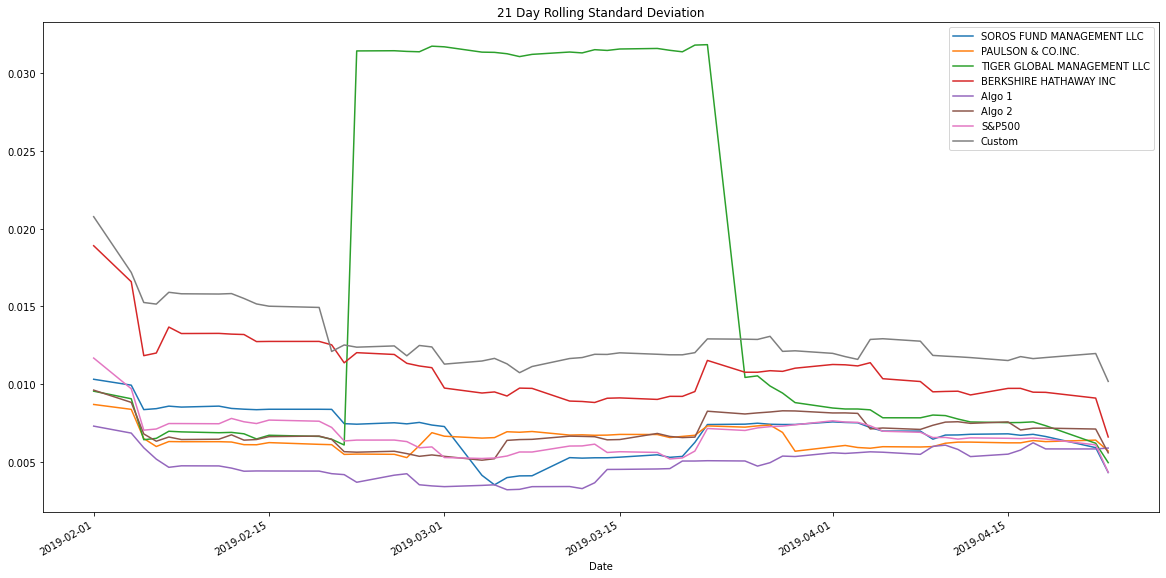

In [474]:
# Rolling
combined_portfolio_returns.rolling(window=21).std().plot(figsize=(20,10),title = "21 Day Rolling Standard Deviation")

In [475]:
# Annualized Sharpe Ratios
annualized_sharpe_ratios = (combined_portfolio_returns.mean() * 252) / (combined_portfolio_returns.std() * np.sqrt(252))
annualized_sharpe_ratios

SOROS FUND MANAGEMENT LLC      4.998934
PAULSON & CO.INC.              2.364248
TIGER GLOBAL MANAGEMENT LLC   -0.384135
BERKSHIRE HATHAWAY INC         4.442098
Algo 1                         3.488488
Algo 2                         5.051608
S&P500                         4.196678
Custom                         1.320592
dtype: float64

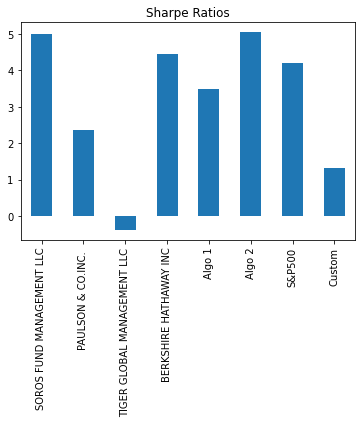

In [428]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

# How does your portfolio do?
My Custom Portfolio didn't perform too well according to the bar plot and the annualized sharpre ratios. 

In [468]:
# Create a correlation analysis
combined_portfolio_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.749951,0.356923,0.741391,0.091970,0.807262,0.789750,0.545348
PAULSON & CO.INC.,0.749951,1.000000,0.268720,0.618347,0.147312,0.737247,0.699920,0.447473
TIGER GLOBAL MANAGEMENT LLC,0.356923,0.268720,1.000000,0.135657,0.022687,0.198111,0.248452,0.129626
BERKSHIRE HATHAWAY INC,0.741391,0.618347,0.135657,1.000000,0.166761,0.779560,0.872547,0.674913
Algo 1,0.091970,0.147312,0.022687,0.166761,1.000000,0.118447,0.125966,0.128296
Algo 2,0.807262,0.737247,0.198111,0.779560,0.118447,1.000000,0.877848,0.579142
S&P500,0.789750,0.699920,0.248452,0.872547,0.125966,0.877848,1.000000,0.648837
Custom,0.545348,0.447473,0.129626,0.674913,0.128296,0.579142,0.648837,1.000000


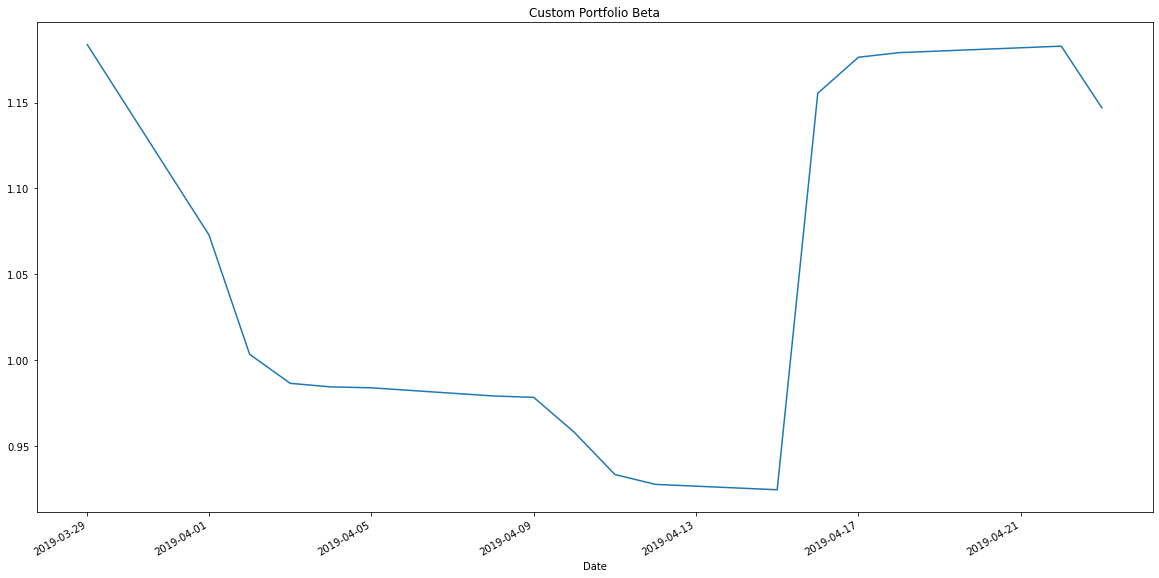

In [469]:
# Beta
rolling_covariance_1 = combined_portfolio_returns['Custom'].rolling(window=60).cov(combined_returns['S&P500'])
rolling_variance_1 = combined_returns['S&P500'].rolling(window=60).var()
rolling_beta_1= rolling_covariance_1 / rolling_variance_1
rolling_beta_1.plot(figsize=(20,10), title="Custom Portfolio Beta")